In [2]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# Download Apple Stock Data
data = yf.download("AAPL", start="2025-01-01", end="2025-11-18")

# Show first rows
data.head()

C:\Users\gasha\AppData\Local\Temp\ipykernel_38608\335990297.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2025-01-01", end="2025-11-18")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,242.752090,247.978453,240.731232,247.809205,55740700
2025-01-03,242.264297,243.080598,240.800915,242.264297,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607269,242.612732,238.969207,240.830782,37628900


In [6]:
#flatten multi index
data.columns = data.columns.get_level_values(0)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,242.752090,247.978453,240.731232,247.809205,55740700
2025-01-03,242.264297,243.080598,240.800915,242.264297,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607269,242.612732,238.969207,240.830782,37628900
...,...,...,...,...,...
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300
2025-11-12,273.470001,275.730011,271.700012,275.000000,48398000
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800


In [12]:
# clean stock data 
#remove rows with missing values
data = data.dropna()
#ensure correct data type
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)
#data[col]

In [15]:
# Calculate the Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

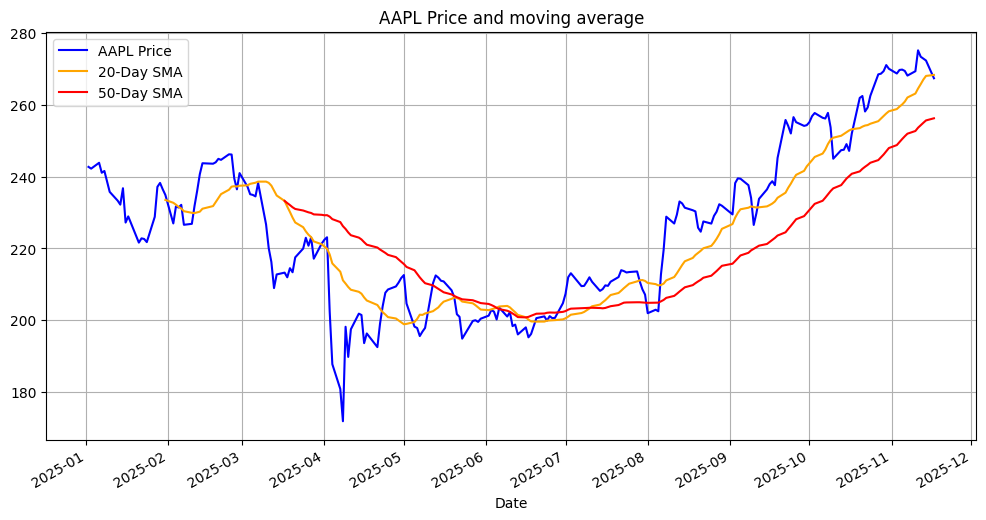

In [16]:
# visualization 
plt.figure(figsize=(12,6))
data[('Close')].plot(label='AAPL Price', color='blue')
data[('MA20')].plot(label='20-Day SMA', color='orange')
data[('MA50')].plot(label='50-Day SMA', color='red')   
plt.title('AAPL Price and moving average') 
plt.legend()
plt.grid(True)
plt.show()              